# Compute performance metrics for the given Y and Y_score without sklearn

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# other than these two you should not import any other packages

# Task A

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [55]:
# write your code here

data=pd.read_csv('5_a.csv')
data.head(2)

,y,proba
0,1.0,0.637387
1,1.0,0.635165


In [56]:
def label(proba):
    if proba>0.5:
        return 1
    else:
        return 0
data['Y_Pred']= data.apply(lambda row:label(row.proba),axis=1)
data

,y,proba,Y_Pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1
...,...,...,...
10095,1.0,0.665371,1
10096,1.0,0.607961,1
10097,1.0,0.777724,1
10098,1.0,0.846036,1


# Confusion Matrix

In [57]:
TN=0
FP=0
TP=0
FN=0

for i in range(len(data.Y_Pred)):
    if data.iloc[i][0]==0:
        if data.iloc[i][2]==0:
            TN=TN+1
        elif data.iloc[i][2]==1:
            FP=FP+1
    elif data.iloc[i][0]==1:
        if data.iloc[i][2]==0:
            FN=FN+1
        elif data.iloc[i][2]==1:
            TP=TP+1
print(TN,FN,TP,FP)
print(len(data.Y_Pred))

0 0 10000 100
10100


# F1 Score

In [58]:
P=0
N=0
TPR=0
Pr=0
Re=0
F1=0
for i in range(len(data.Y_Pred)):
    if data.iloc[i][0]==1:
        P=P+1
print(P)
for i in range(len(data.Y_Pred)):
    if data.iloc[i][0]==0:
        N=N+1
print(N)
Precision=(TP/(TP+FP))
Recall=(TP/(TP+FN))
F1_Score = ((2*Precision*Recall)/(Precision+Recall))

Accuracy=((TN+TP)/(len(data.Y_Pred)))
print('Recall:',Recall)
print('Precision:',Precision)
print('F1_Score:',F1_Score)
print('Accuracy:',Accuracy)

10000
100
Recall: 1.0
Precision: 0.9900990099009901
F1_Score: 0.9950248756218906
Accuracy: 0.9900990099009901


In [59]:
Y_Unique=data['proba'].unique()
Y_Sorted=sorted(Y_Unique, reverse=True)
len(Y_Sorted)
print(Y_Sorted[2])

0.89982484614942


# Threshold

In [60]:
FPR=[]
TPR=[]
def label(proba,Y):
    if proba>Y:
        return 1.0
    else:
        return 0.0
num1=(len(Y_Sorted)/20) 
num2=int(num1)
for j in range(20):
    j=j*num2
    TP=0
    FP=0
    data['Y_Pred'] = data.apply(lambda row:label(row.proba,Y_Sorted[j]),axis=1)
    print(Y_Sorted[j])
    for i in range(len(data.Y_Pred)):
            if data.iloc[i][0]==0 and data.iloc[i][2]==1:
                FP=FP+1
            elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
                TP=TP+1   
    TPR.append(TP/P)
    FPR.append(FP/N)
print(TPR)
print(FPR)

0.8999653487823838
0.8789433467386063
0.8586802522675053
0.8367123843724431
0.8152561086276665
0.7939112121227851
0.7727822752553082
0.7542612391647749
0.7350780957724631
0.7158581925180078
0.6970089962073902
0.6778537607355049
0.6592325052519856
0.6390345012312024
0.6197965132162059
0.600521990944984
0.5782148375959256
0.5596598747232789
0.5390419204554349
0.5189471886154078
[0.0, 0.0499, 0.0997, 0.1498, 0.2, 0.2499, 0.3001, 0.3498, 0.3997, 0.4499, 0.4998, 0.5497, 0.6001, 0.65, 0.6997, 0.7497, 0.7996, 0.8498, 0.9001, 0.9503]
[0.0, 0.06, 0.13, 0.17, 0.2, 0.26, 0.29, 0.37, 0.43, 0.46, 0.52, 0.58, 0.59, 0.65, 0.73, 0.78, 0.84, 0.87, 0.89, 0.92]


AUC Score
0.409868


No handles with labels found to put in legend.


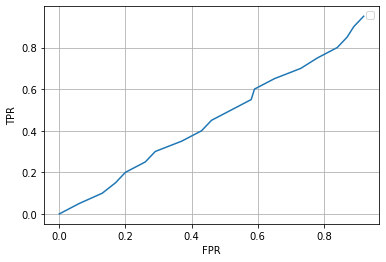

In [61]:
#AUC SCORE
print('AUC Score')
AUC=np.trapz(TPR,FPR)
print(AUC)
plt.plot(FPR,TPR)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# Task B

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [62]:
# write your code
data_b=pd.read_csv('5_b.csv')

def label(proba):
    if proba>0.5:
        return 1
    else:
        return 0
data_b['Y_Pred']= data_b.apply(lambda row:label(row.proba),axis=1)
data_b

,y,proba,Y_Pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0
...,...,...,...
10095,0.0,0.474401,0
10096,0.0,0.128403,0
10097,0.0,0.499331,0
10098,0.0,0.157616,0


In [63]:
# Confusion Matrix
print('Confusion Matrix')
TN=0
FP=0
TP=0
FN=0

for i in range(len(data_b.Y_Pred)):
    if data_b.iloc[i][0]==0:
        if data_b.iloc[i][2]==0:
            TN=TN+1
        elif data_b.iloc[i][2]==1:
            FP=FP+1
    elif data_b.iloc[i][0]==1:
        if data_b.iloc[i][2]==0:
            FN=FN+1
        elif data_b.iloc[i][2]==1:
            TP=TP+1
print(TN,FN,TP,FP)
print(len(data_b.Y_Pred))

Confusion Matrix
9761 45 55 239
10100


In [65]:
# F1 Score
print('F1 Score')
P=0
N=0
TPR=0
Pr=0
Re=0
F1=0
for i in range(len(data_b.Y_Pred)):
    if data_b.iloc[i][0]==1:
        P=P+1
print(P)
for i in range(len(data_b.Y_Pred)):
    if data_b.iloc[i][0]==0:
        N=N+1
print(N)
Precision=(TP/(TP+FP))
Recall=(TP/(TP+FN))
F1_Score = ((2*Precision*Recall)/(Precision+Recall))

Accuracy=((TN+TP)/(len(data_b.Y_Pred)))
print('Recall:',Recall)
print('Precision:',Precision)
print('F1_Score:',F1_Score)
print('Accuracy:',Accuracy)
Y_Unique=data_b['proba'].unique()
Y_Sorted=sorted(Y_Unique, reverse=True)
print(len(Y_Sorted))
print(Y_Sorted[2])


F1 Score
100
10000
Recall: 0.55
Precision: 0.1870748299319728
F1_Score: 0.2791878172588833
Accuracy: 0.9718811881188119
10100
0.5921978708413235


In [73]:
# Threshold
print('Threshold')
FPR=[]
TPR=[]
def label(proba,Y):
    if proba>Y:
        return 1.0
    else:
        return 0.0
num1=(len(Y_Sorted)/100) 
num2=int(num1)
for j in range(100):
    j=j*num2
    TP=0
    FP=0
    data_b['Y_Pred'] = data_b.apply(lambda row:label(row.proba,Y_Sorted[j]),axis=1)
    print(Y_Sorted[j])
    for i in range(len(data_b.Y_Pred)):
            if data_b.iloc[i][0]==0 and data_b.iloc[i][2]==1:
                FP=FP+1
            elif data_b.iloc[i][0]==1 and data_b.iloc[i][2]==1:
                TP=TP+1   
    TPR.append(TP/P)
    FPR.append(FP/N)
print(TPR)
print(FPR)

Threshold
0.5952941839776669
0.507830143649192
0.5034743922991184
0.49958436886307894
0.4951150787007373
0.4908472361799197
0.4859894623022954
0.4826990640776901
0.4785408535851918
0.4741871304673919
0.4708950648287342
0.4668481812932028
0.4627516056315592
0.4586053227248274
0.4541557689502512
0.4505537071725685
0.4467969718387781
0.4429440697309405
0.4395188416283383
0.4356562545196748
0.4313828121363624
0.4272975479276155
0.42367498534227
0.4194993630110482
0.415382627433729
0.4108091972110284
0.4059088882327659
0.4017689799218327
0.3977770161269245
0.3937825954157905
0.3900809570330236
0.3849571776226062
0.3807049752106503
0.3768220684316719
0.37269906540125053
0.36920001085676346
0.36470844840872496
0.3603867640083367
0.3563474811743952
0.35216412484157045
0.3477354265299383
0.3438150680740197
0.3399322305586455
0.33512946874684824
0.33055751590173765
0.3259571205748201
0.32184440121596314
0.31716560254710063
0.3122407679420378
0.3077064695707288
0.3033682781022237
0.29899015511428

AUC Score
0.926321


No handles with labels found to put in legend.


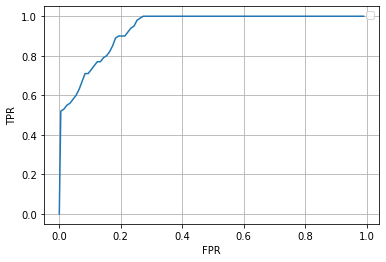

In [74]:
#AUC SCORE
print('AUC Score')
AUC=np.trapz(TPR,FPR)
print(AUC)
plt.plot(FPR,TPR)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# Task C

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [4]:
from tqdm import tqdm_notebook
data_c=pd.read_csv('5_c.csv')
#data_c.head
#data_c.shape[0]

In [5]:
s = data_c['y'].value_counts()#Actual Labels
print("Occurence of P, ",s[1])
print("Occurence of N, ",s[0])
b = data_c['prob'].value_counts()# Predicted Labels
print("Occurence of Prob, ",b)

Occurence of P,  1047
Occurence of N,  1805
Occurence of Prob,  0.839377    4
0.672003    3
0.596618    3
0.704297    2
0.123316    2
           ..
0.315248    1
0.355742    1
0.214257    1
0.190617    1
0.332771    1
Name: prob, Length: 2791, dtype: int64


In [6]:
def partition(c,x):
    if x < c:
        return 0
    return 1
pre = data_c['prob']
f = lambda lst: partition(0.5,lst)
p = pre.map(f)
data_c['proba'] = p
data_c.head(10)

,y,prob,proba
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0
5,0,0.595387,1
6,0,0.370288,0
7,0,0.299273,0
8,0,0.297000,0
9,0,0.266479,0


In [7]:
def para(data_c):
    p=0
    n=0
    fn=0
    fp=0
    for i in range(data_c.shape[0]):
        if data_c['y'][i]==data_c['prob'][i]:
            if data_c['y'][i]==1:
                p+=1
            else:
                n+=1
        else:
            if data_c['y'][i]==1:
                fn+=1
            else:
                fp+=1
    return(p,n,fn,fp)


def metric(data_c,uni):
    s = data_c['y'].value_counts()
    a = []
    for el in tqdm_notebook(uni):
        dx = data_c.copy()
        pre = dx['prob']
        f = lambda lst: partition(el,lst)
        h = pre.map(f)
        dx['prob'] = h
        p,n,fp,fn=para(dx)
        a.append(500*fp+100*fn)
    
    return uni[a.index(min(a))],min(a)

In [8]:
data_c = data_c.sort_values(by='prob',ascending=False)
print(data_c.head(10))
uni = list(data_c.prob.unique())
uni.sort(reverse=True)
for i in range(5):
    print(uni[i])
print(len(uni))
data_c = pd.read_csv("5_c.csv")

      y      prob  proba
2634  1  0.957747      1
2548  1  0.951437      1
2447  1  0.948638      1
2788  1  0.944094      1
2456  1  0.941113      1
2469  1  0.921611      1
2599  1  0.918113      1
2515  1  0.916364      1
2294  1  0.913375      1
2702  1  0.913280      1
0.9577467989277196
0.9514369163158778
0.9486377939984604
0.9440936134070964
0.9411131844327256
2791


In [9]:
low,b=metric(data_c,uni)
print("Threshold and the value of the min metric are as follows resp.")
print(low,b)


Threshold and the value of the min metric are as follows resp.
0.2300390278970873 141000


# Task D 
# MSE MAPE RSquare Error

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [43]:
#MSE
data_d=pd.read_csv('5_d.csv')
data_d['Y_err'] = data_d.apply(lambda row:(row.y)-(row.pred),axis=1)
data_d.head()
soe=0
for i in range(len(data_d.Y_err)):
    soe=soe+((data_d.Y_err[i])*(data_d.Y_err[i]))
MSE=(soe/len(data_d.Y_err))
print(MSE)


177.16569974554707


In [46]:
#R Sqaure Error
Sum=0
SS=0
for i in range(len(data_d.y)):
    Sum=Sum+data_d.y[i]
Avg=Sum/(len(data_d.y))  #computing Average
print(Sum,Avg)
data_d['Y_SS'] = data_d.apply(lambda row:(row.y)-(Avg),axis=1)#computing (y-y_Avg)
data_d.head()
for i in range(len(data_d.y)):
    SS=SS+(data_d.Y_SS[i])*(data_d.Y_SS[i])#sum of sq (y-y_Avg)
print(SS,'\n')
R2=1-(soe/SS)#computing R-square
print(R2)

10463560.0 66.56208651399491
638161080.035662 

0.9563582786990964


In [51]:
#MAPE
data_d = pd.read_csv("5_d.csv") 
data_d['Y_err'] = data_d.apply(lambda row:(row.y)-(row.pred),axis=1)#computing (y-y_pred)
data_d.head()
SOE=0
for i in range(len(data_d.Y_err)):
    SOE=SOE+abs(data_d.Y_err[i])#sum of sq (y-y_pred)
MAPE=(SOE/(Sum))#MAPe
print(SOE)
print(MAPE)
    

1351058.0
0.1291202994009687


In [53]:
data_d.head()

,y,pred,Y_err
0,101.0,100.0,1.0
1,120.0,100.0,20.0
2,131.0,113.0,18.0
3,164.0,125.0,39.0
4,154.0,152.0,2.0
